# Colin Ng Data Science Salaries Project

Dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

This data set contains 11 columns, each representing:

work_year: The year the salary was paid.

experience_level: The experience level in the job during the year.

employment_type: The type of employment for the role.

job_title: The role worked in during the year.

salary: The total gross salary amount paid.

salary_currency: The currency of the salary paid as an ISO 4217 currency code.

salaryinusd: The salary in USD.

employee_residence: Employee's primary country of residence during the work year as an ISO 3166 country code.

remote_ratio: The overall amount of work done remotely.

company_location: The country of the employer's main office or contracting branch.

company_size: The median number of people that worked for the company during the year.


Outline

1. Data Analysis
2. Data Preprocessing
3. Data Visualizations
4. Machine Learning, Predicting Salaries

## 1. Data Analysis

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

salary_df = pd.read_csv('ds_salaries.csv')
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [105]:
salary_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [106]:
# Histogram of work_year
fig1 = px.histogram(salary_df, x='work_year', title='Distribution of Work Years')
fig1.show()

In [107]:
salary_df['work_year'].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

Majority of the data collected are from after 2021 and before 2024, therefore there is a lot of bias dictated by those years that we have to take into account. Like COVID and inflation for example.

In [108]:
salary_df['experience_level'].value_counts()
#SE = Senior
#MI = Mid
#EN = Entry
#EX = Executive

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [109]:
ex_level = salary_df['experience_level'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Experience Level')
fig.show()

In [110]:
salary_df['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [111]:
salary_df['job_title'].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [112]:
ex_level = salary_df['job_title'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'job_title ')
fig.show()

Data Engineer, Data Scientist, and Data Analysts are at the top when it comes to data science related jobs.

In [113]:
salary_df['salary_currency'].value_counts()

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

USD is the overwhelming majority of salaries, followed by the Euro, and then the British pound sterling

In [114]:
salary_df['employee_residence'].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

United States employees make up the overwhelming majority of workers.

In [115]:
salary_df['company_size'].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

Medium sized companies make up most of the dataset, followed by large, and then small

In [116]:
salary_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


## 2. Data Preprocessing

Checking if there are any null values

In [117]:
salary_df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Checking if there are any dupicate values

In [118]:
salary_df.duplicated().sum()

1171

Removing the duplicate values

In [119]:
salary_df =salary_df.drop_duplicates(keep="first")

## 3. Data Visualizations

In [120]:
#The Salary Based on the job
salary_df['salary_in_usd'].groupby(salary_df['job_title']) .mean()

job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               150151.747253
                                     ...      
Research Engineer                165909.393939
Research Scientist               153486.369231
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64

In [121]:
jobs = salary_df[salary_df['work_year']==2023]['job_title'].value_counts().nlargest(10).reset_index()
jobs

,index,job_title
0,Data Engineer,269
1,Data Scientist,223
2,Data Analyst,195
3,Machine Learning Engineer,103
4,Analytics Engineer,41
5,Research Scientist,38
6,Data Architect,31
7,Research Engineer,28
8,Applied Scientist,20
9,Data Manager,18


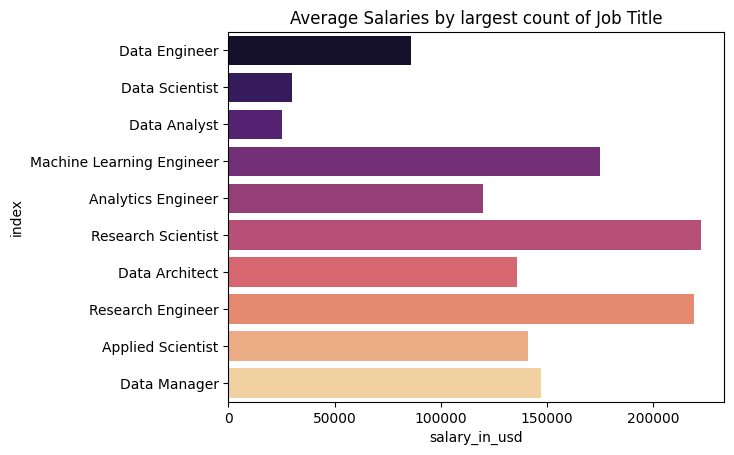

In [122]:
fig, ax = plt.subplots()
ax.set_title('Average Salaries by largest count of Job Title')
ax = sns.barplot(ax = ax, data = jobs , y = jobs['index'], x = salary_df['salary_in_usd'],palette='magma')

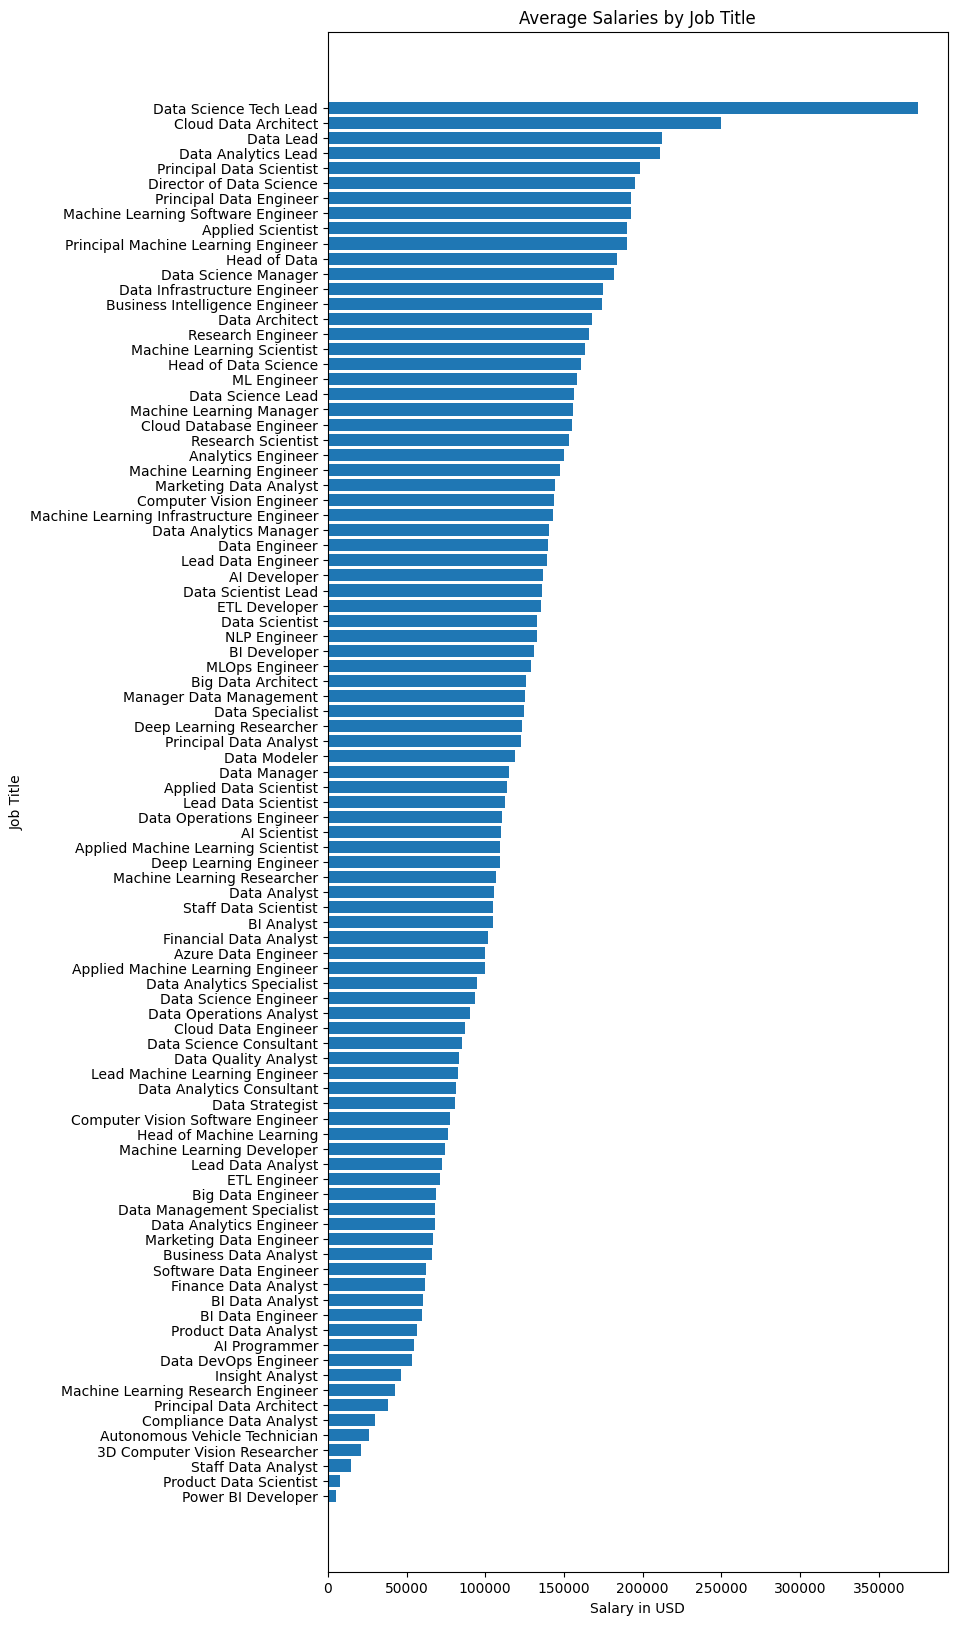

In [123]:
# Calculate mean salaries for each job title
job_title_salaries = salary_df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=True)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 20))
ax.barh(job_title_salaries.index, job_title_salaries.values)
ax.set_title('Average Salaries by Job Title')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Job Title')
plt.show()

Top 10: Job Titles and Their Average Salary

In [124]:
top_salary =  salary_df.groupby('job_title').agg({'salary_in_usd':'mean'}).round(2).sort_values('salary_in_usd', ascending=False).head(10)
top_salary.head(10)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.00
Cloud Data Architect,250000.00
Data Lead,212500.00
Data Analytics Lead,211254.50
Principal Data Scientist,198171.12
Director of Data Science,195140.73
Principal Data Engineer,192500.00
Machine Learning Software Engineer,192420.00
Applied Scientist,190342.58


In [125]:
#salary based off work experience
salary_df['salary_in_usd'].groupby(salary_df['experience_level']).mean()

experience_level
EN     72648.685185
EX    191078.208333
MI    101828.783133
SE    153897.435650
Name: salary_in_usd, dtype: float64

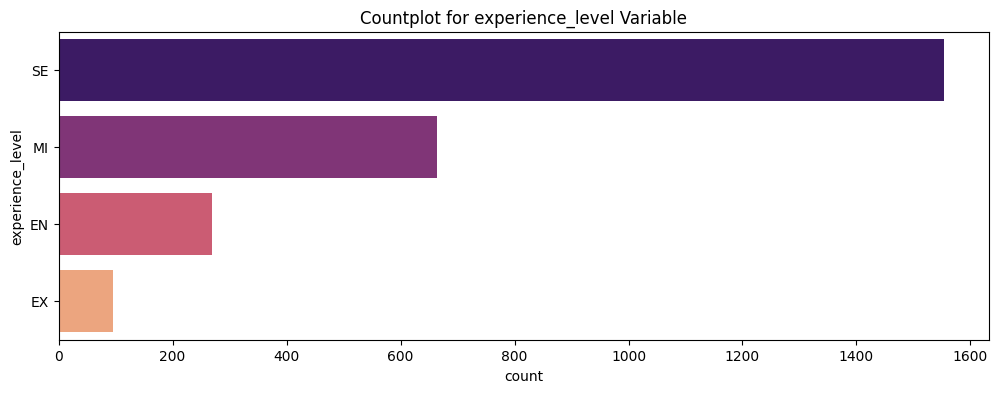

In [126]:
plt.figure(figsize=[12,4])
sns.countplot(y = salary_df['experience_level'],palette='magma')
plt.title('Countplot for experience_level Variable')
plt.show()

SE = Senior
MI = Mid
EN = Entry
EX = Executive

There are a lot more senior roles compared to other roles, with executive roles having the lowest count.

[Text(0.5, 1.0, 'Box Plot of Experience vs Salary')]

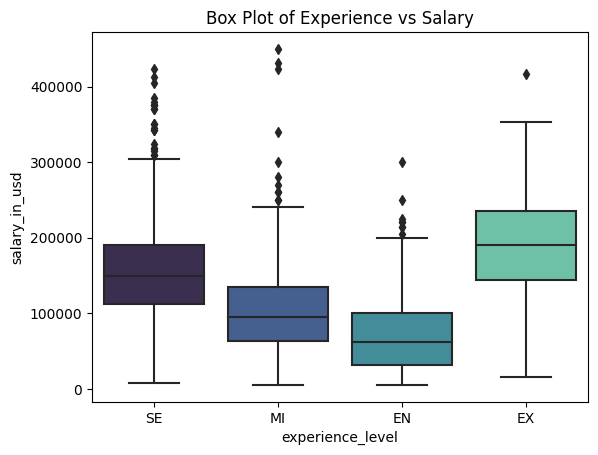

In [127]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=salary_df,palette='mako').set(title='Box Plot of Experience vs Salary')

Salaries based on Employment

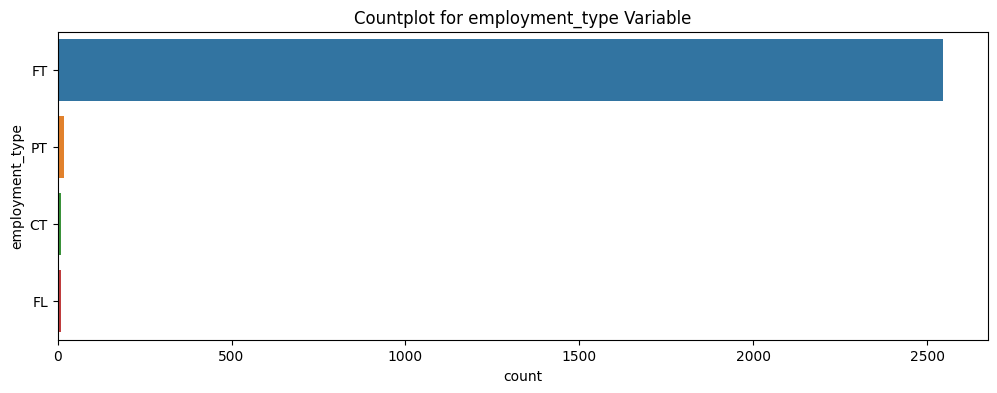

In [128]:
plt.figure(figsize=[12,4])
sns.countplot(y = salary_df['employment_type'],order = salary_df['employment_type'].value_counts().index,palette='tab10')
plt.title('Countplot for employment_type Variable')
plt.show()

The overwhelming majority of employment type is full time, followed by part time, contract, and then freelance

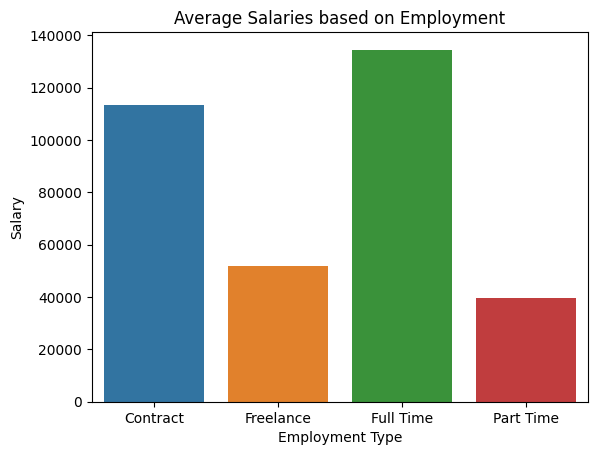

In [129]:
employ_wise_salary=np.array(salary_df['salary_in_usd'].groupby(salary_df['employment_type']).mean())
plt.title("Average Salaries based on Employment")
plt.xlabel('Employment Type')
plt.ylabel('Salary')
sns.barplot(x=['Contract', 'Freelance', 'Full Time', 'Part Time'],y=employ_wise_salary)
plt.show()

Salaries based off of company size

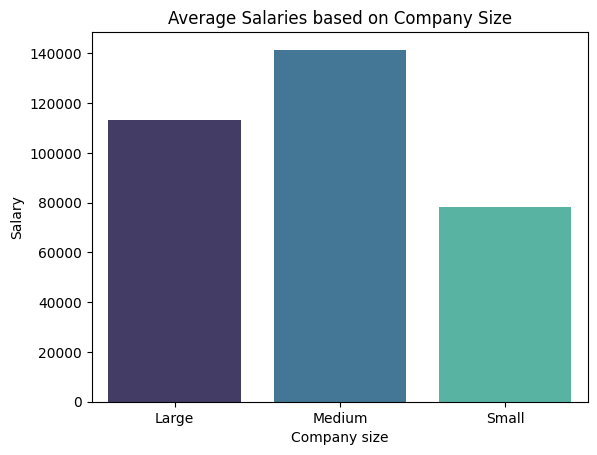

In [130]:
salary_df['salary_in_usd'].groupby(salary_df['work_year']) .mean()
compsize_based_salary=np.array(salary_df['salary_in_usd'].groupby(salary_df['company_size']).mean())
compsize_based_title=['Large', 'Medium', 'Small']
plt.title("Average Salaries based on Company Size")
plt.xlabel('Company size')
plt.ylabel('Salary')
sns.barplot(x=compsize_based_title,y=compsize_based_salary,palette='mako')
plt.show()

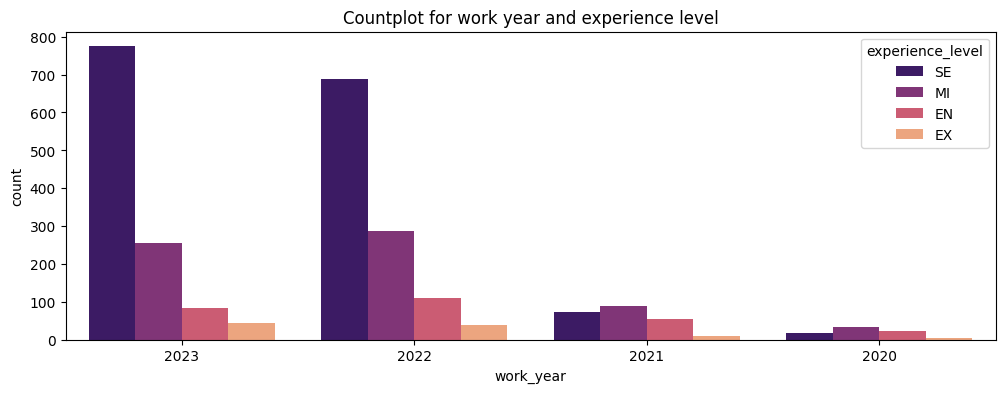

In [131]:
plt.figure(figsize=[12,4])
sns.countplot(x = salary_df['work_year'],hue=salary_df['experience_level'],order=salary_df['work_year'].value_counts().index,palette='magma')
plt.title('Countplot for work year and experience level')
plt.show()

## 4. Machine Learning, Predicting Salaries

In [132]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [133]:
df_copy = salary_df
df_copy.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [134]:
df_copy.drop(columns=["salary", "salary_currency"], inplace=True)

C:\Users\Sasun\AppData\Local\Temp\ipykernel_15272\2058128500.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Removing Outliers

In [135]:
Q1 = df_copy['salary_in_usd'].quantile(0.25)
Q3 = df_copy['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
df_copy = df_copy[~((df_copy['salary_in_usd']< (Q1 - 1.5 * IQR)) | (df_copy['salary_in_usd'] > (Q3 + 1.5 * IQR)))]
df_copy.shape

(2555, 9)

In [136]:
cat_cols = ["experience_level", "employment_type", "job_title", "employee_residence", "company_location", "company_size"]

enc = OrdinalEncoder()
df_copy[cat_cols] = enc.fit_transform(df_copy[cat_cols])

C:\Users\Sasun\AppData\Local\Temp\ipykernel_15272\3936455532.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
df_copy.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3.0,2.0,83.0,85847,26.0,100,25.0,0.0
1,2023,2.0,0.0,65.0,30000,74.0,100,70.0,2.0
2,2023,2.0,0.0,65.0,25500,74.0,100,70.0,2.0
3,2023,3.0,2.0,46.0,175000,11.0,100,12.0,1.0
4,2023,3.0,2.0,46.0,120000,11.0,100,12.0,1.0


In [138]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.drop("salary_in_usd", axis=1), df_copy["salary_in_usd"], test_size=0.20, random_state=40)

In [139]:
model = XGBRegressor(
    objective="reg:squarederror",
    n_estimators=10_000,
    max_depth=7,
    learning_rate=0.1,
)

In [140]:
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=500,
    eval_metric="rmse",
    verbose=50
)

[0]	validation_0-rmse:134692.67188
[50]	validation_0-rmse:47179.64062
[100]	validation_0-rmse:47768.99609


c:\Users\Sasun\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[150]	validation_0-rmse:48090.96875
[200]	validation_0-rmse:48405.93750
[250]	validation_0-rmse:48693.63281
[300]	validation_0-rmse:48905.90234
[350]	validation_0-rmse:49134.88672
[400]	validation_0-rmse:49283.29688
[450]	validation_0-rmse:49455.55078
[500]	validation_0-rmse:49557.81250
[538]	validation_0-rmse:49624.48828


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [141]:
print(f"Best iteration: {model.best_iteration} - RMSE: {model.best_score}")


Best iteration: 38 - RMSE: 46970.925781


In [142]:
y_pred = model.predict(X_test)

print("RMSE: %.4f" % (mean_squared_error(y_test, y_pred, squared=False)))
print("MSE: %.4f" % (mean_squared_error(y_test, y_pred)))
print("MAE: %.4f" % (mean_absolute_error(y_test, y_pred)))

RMSE: 46970.9285
MSE: 2206268119.9595
MAE: 35733.9976


Based on the RMSE, we can conclude the models predictions vary roughly 46970 USD away from the actual target. This means that, on average, the model is +-$46970 from the actual salary of the given role.



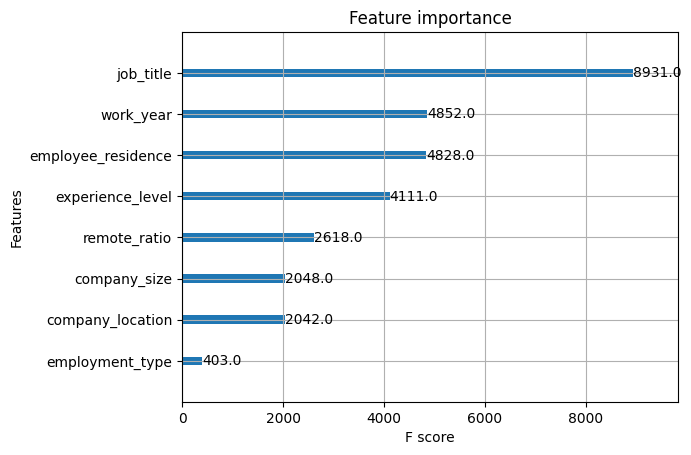

In [143]:
xgb.plot_importance(model)
plt.show()

The job title has the most importance when it comes to determining the salary. While employment type has the least importance.